In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
single_image= X_train[0]

In [6]:
single_image.shape

(28, 28)

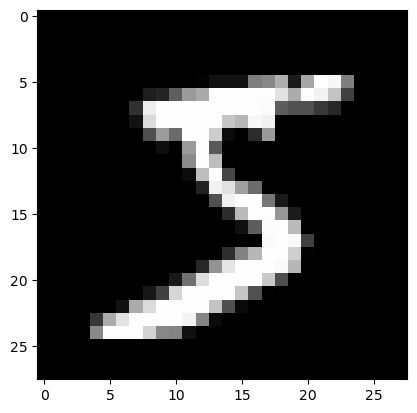

In [7]:
plt.imshow(single_image,cmap='gray')

In [8]:
y_train.shape

(60000,)

In [9]:
X_train.min()

0

In [10]:
X_train.max()

255

In [11]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [12]:
X_train_scaled.min()

0.0

In [13]:
X_train_scaled.max()

1.0

In [14]:
y_train[0]

5

In [15]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [16]:
type(y_train_onehot)

numpy.ndarray

In [18]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [19]:
model = keras.Sequential()
input = keras.Input(shape=(28,28,1))
model.add(input)
model.add(layers.Conv2D(filters=32,kernel_size=(5,5),strides=(1,1),padding='valid',activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(20,activation='relu'))
model.add(layers.Dense(15,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [20]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,batch_size=64, validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 14s 14ms/step - loss: 0.3680 - accuracy: 0.8863 - val_loss: 0.1305 - val_accuracy: 0.9604
Epoch 2/5
938/938 [==============================] - 13s 13ms/step - loss: 0.1035 - accuracy: 0.9708 - val_loss: 0.0702 - val_accuracy: 0.9788
Epoch 3/5
938/938 [==============================] - 12s 13ms/step - loss: 0.0706 - accuracy: 0.9791 - val_loss: 0.0652 - val_accuracy: 0.9811
Epoch 4/5
938/938 [==============================] - 13s 13ms/step - loss: 0.0566 - accuracy: 0.9832 - val_loss: 0.0498 - val_accuracy: 0.9852
Epoch 5/5
938/938 [==============================] - 14s 15ms/step - loss: 0.0454 - accuracy: 0.9862 - val_loss: 0.0496 - val_accuracy: 0.9849


<AxesSubplot:>

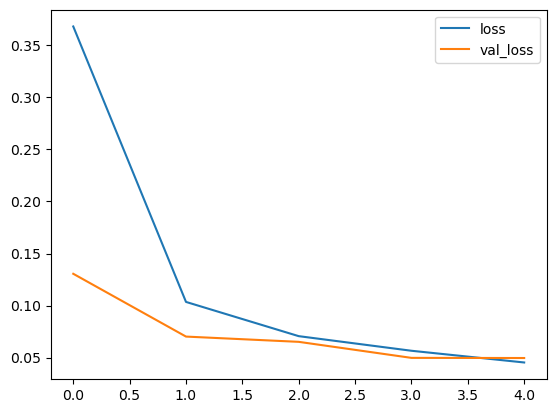

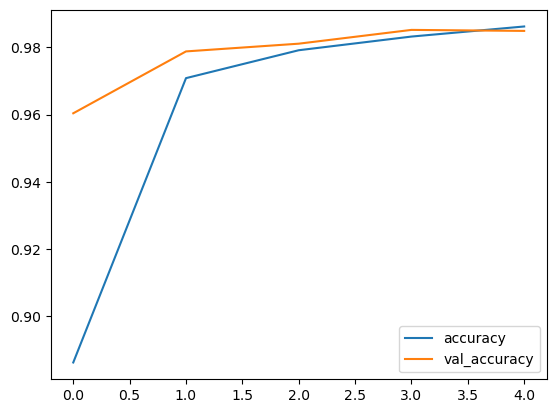

In [22]:
metrics = pd.DataFrame(model.history.history)
metrics.head()
metrics[['loss','val_loss']].plot()
metrics[['accuracy','val_accuracy']].plot()

In [23]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)
print(confusion_matrix(y_test,x_test_predictions))
print(classification_report(y_test,x_test_predictions))

313/313 [==============================] - 1s 3ms/step
[[ 974    0    0    0    0    1    1    1    2    1]
 [   0 1129    3    0    1    1    0    1    0    0]
 [   2    2 1009    0    3    0    0   13    2    1]
 [   0    0    6  990    0    9    0    2    2    1]
 [   1    0    0    0  974    0    2    1    0    4]
 [   2    0    0    3    0  881    3    0    2    1]
 [   5    3    0    0    5    1  943    0    1    0]
 [   0    2    4    1    0    1    0 1015    2    3]
 [  11    1    1    1    2    0    2    4  946    6]
 [   3    3    0    0    7    2    0    4    2  988]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.99      0.98      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.98  